**Import libraries and load data**

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# read csv file

df = pd.read_csv('/kaggle/input/diwali-dales-dataset/diwali_sales_data.csv', encoding='unicode_escape')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [6]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#check for null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.duplicated().sum()

8

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(11243, 13)

In [12]:
df[['Gender', 'Age Group', 'Marital_Status', 'Orders', 'Amount']].describe

<bound method NDFrame.describe of       Gender Age Group  Marital_Status  Orders   Amount
0          F     26-35               0       1  23952.0
1          F     26-35               1       3  23934.0
2          F     26-35               1       3  23924.0
3          M      0-17               0       2  23912.0
4          M     26-35               1       2  23877.0
...      ...       ...             ...     ...      ...
11246      M     18-25               1       4    370.0
11247      M     26-35               0       3    367.0
11248      F     36-45               0       4    213.0
11249      M     36-45               0       3    206.0
11250      F     18-25               0       3    188.0

[11243 rows x 5 columns]>

In [13]:
#remove null values
df.dropna(inplace=True)
df.shape

(11231, 13)

In [14]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


**Change data types**

In [16]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [17]:
#check data type of particular column
df['Amount'].dtypes

dtype('int64')

In [18]:
#list all columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
#rename column name
df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)

In [20]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
#usingbdescribe for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [22]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# **Exploratory Data Analysis**

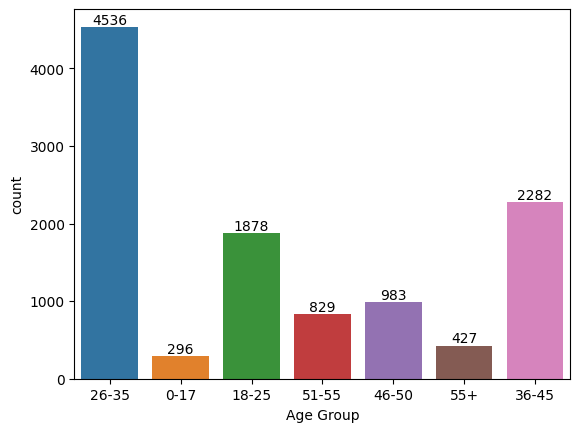

In [23]:
#plotting a bar chart for age group and its count

ax=sns.countplot(x='Age Group', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Plots a bar chart showing the count of each age group and labels the bars with their respective counts.

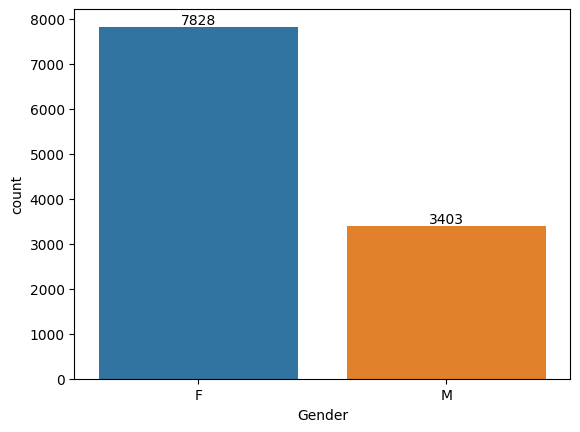

In [24]:
#plotting a bar chart for age group and its count

ax=sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

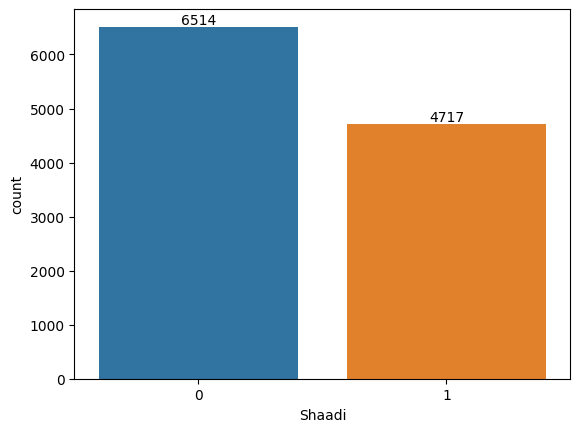

In [25]:
#plotting a bar chart for shaadi and its count

ax=sns.countplot(x='Shaadi', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

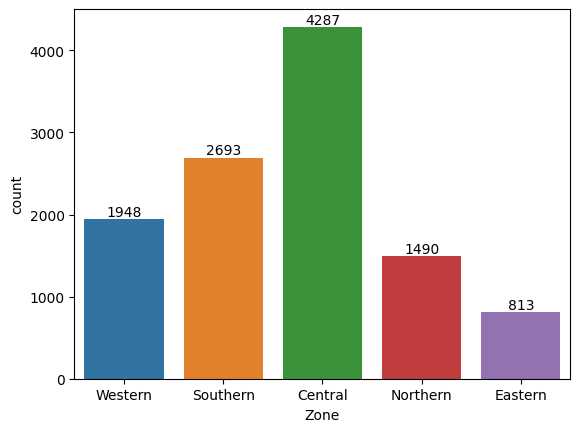

In [26]:
#plotting a bar chart for shaadi and its count

ax=sns.countplot(x='Zone', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74307679
1,M,31871146


<Axes: xlabel='Gender', ylabel='Amount'>

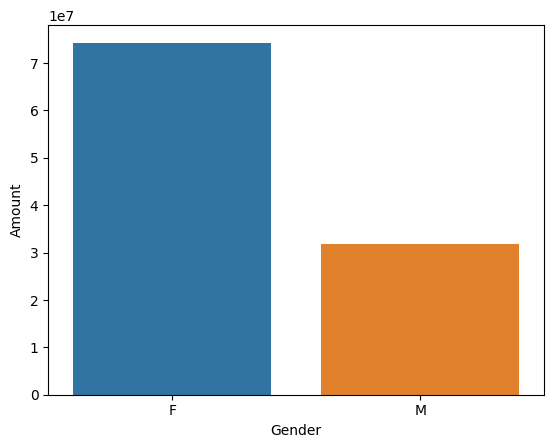

In [28]:
#plotting a bar chart for Gender vs total amount 

sales_gen=df.groupby(['Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

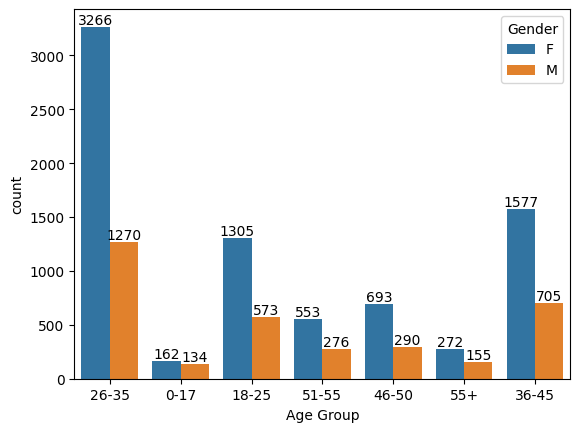

In [30]:
#plotting a bar chart for Age group and its count by gender  
ax=sns.countplot(x='Age Group',hue='Gender' ,  data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.groupby(['Age Group'], as_index=False)['Amount']. sum().sort_values(by='Amount', ascending=False)

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

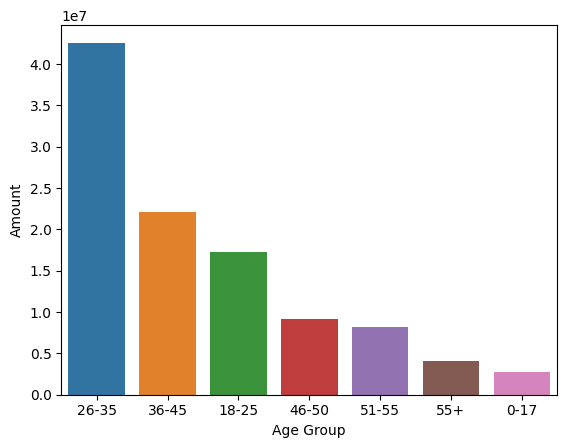

In [32]:
#age group vs total sales
sales_Agegroup=df.groupby(['Age Group'], as_index=False)['Amount']. sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_Agegroup)

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='Shaadi', ylabel='Amount'>

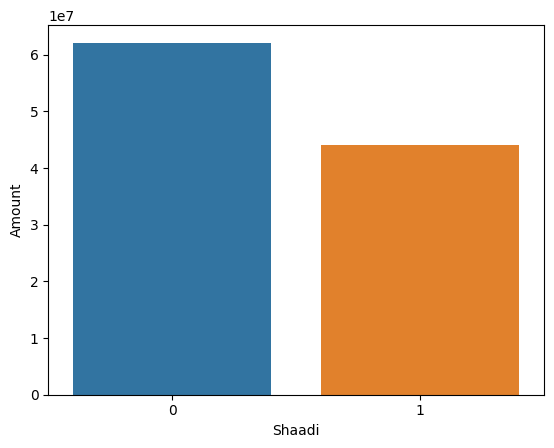

In [34]:
#shaadi  vs total sales

sales_shaadi=df.groupby(['Shaadi'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Shaadi', y='Amount', data=sales_shaadi)

<Axes: xlabel='Zone', ylabel='Amount'>

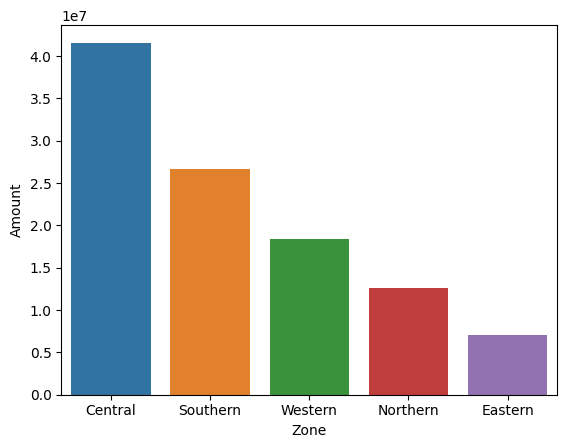

In [35]:
#zone vs total sales

sales_zone=df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Zone', y='Amount', data=sales_zone)

**Top 5 most sold product category**

<Axes: title={'center': 'Most sold product category'}, xlabel='Product_Category', ylabel='Amount'>

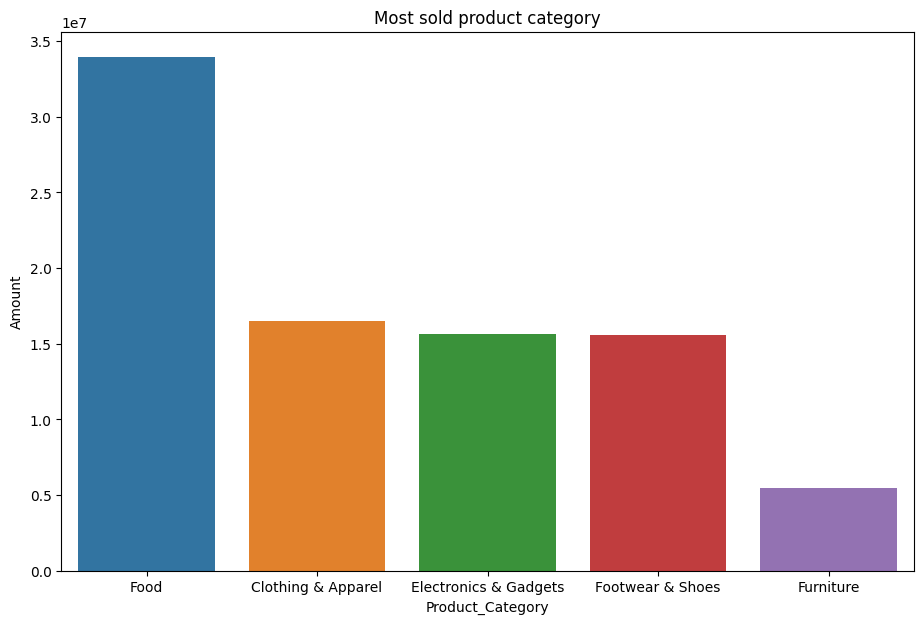

In [36]:
#top 5  sold value of  product category

sales_product=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
#sns.set(rc={'figure.figsize':(11,5)})
plt.figure(figsize=(11, 7))
plt.title("Most sold product category")
sns.barplot(x='Product_Category', y='Amount', data=sales_product)

**Top 5 most ordered product category**

<Axes: xlabel='Product_Category', ylabel='Orders'>

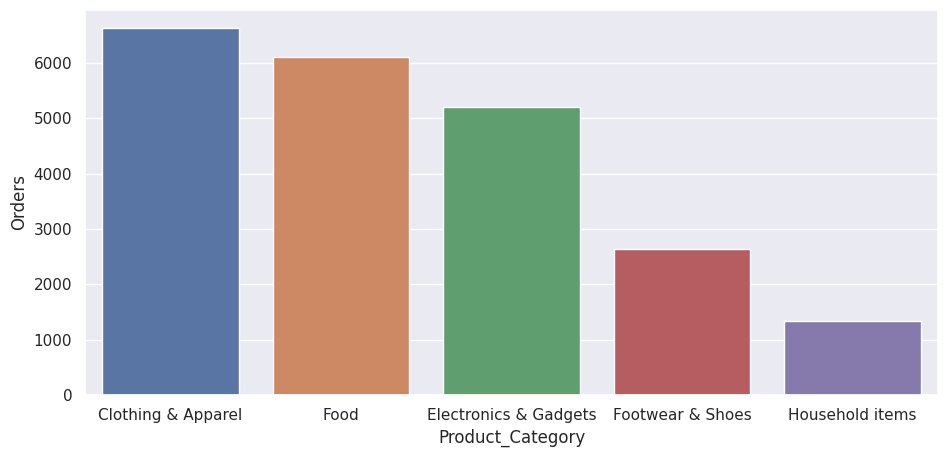

In [37]:
#top 5 most ordered product category

orders_product=df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
sns.set(rc={'figure.figsize':(11,5)})
sns.barplot(x='Product_Category', y='Orders', data=orders_product)

**Top 10 states with highest sales**

<Axes: xlabel='State', ylabel='Amount'>

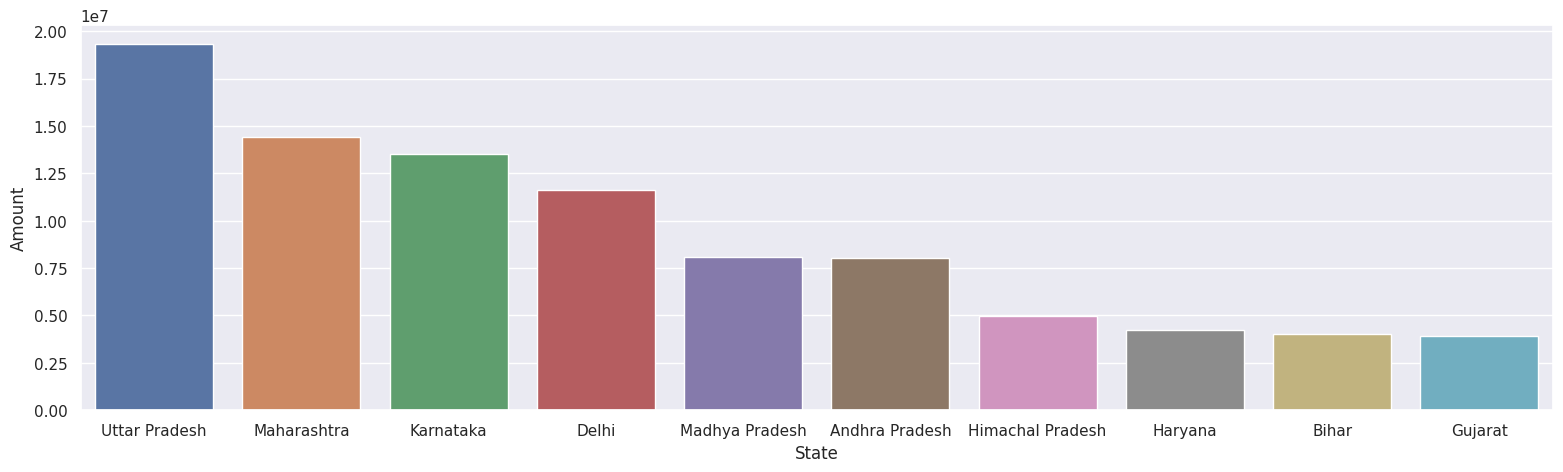

In [38]:
#top 10 states with highest sales

sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(19,5)})
sns.barplot(x='State', y='Amount', data=sales_state)

<Axes: xlabel='State', ylabel='Orders'>

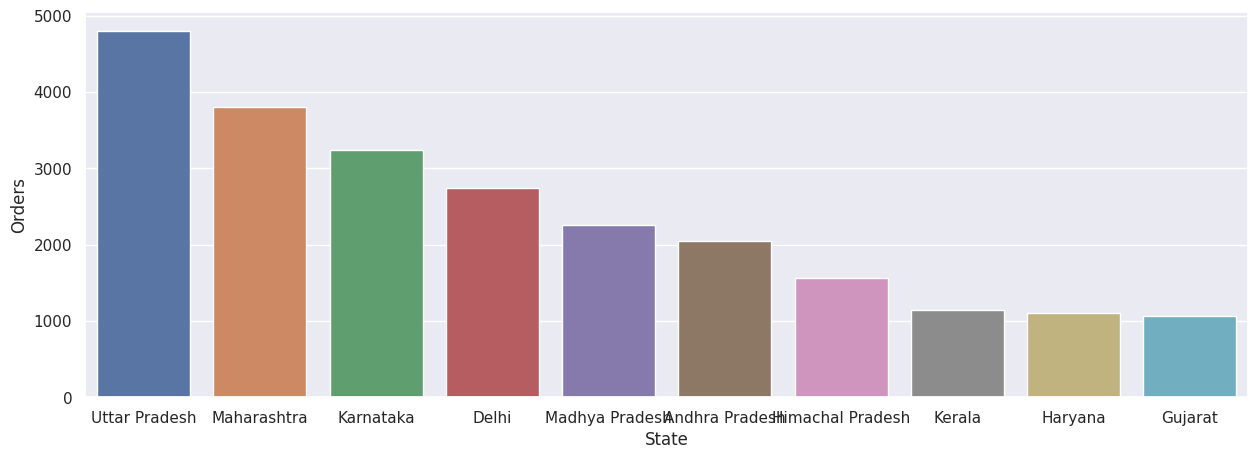

In [39]:
#top 10 states with highest orders

orders_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Orders', data=orders_state)

<Axes: xlabel='Occupation', ylabel='Orders'>

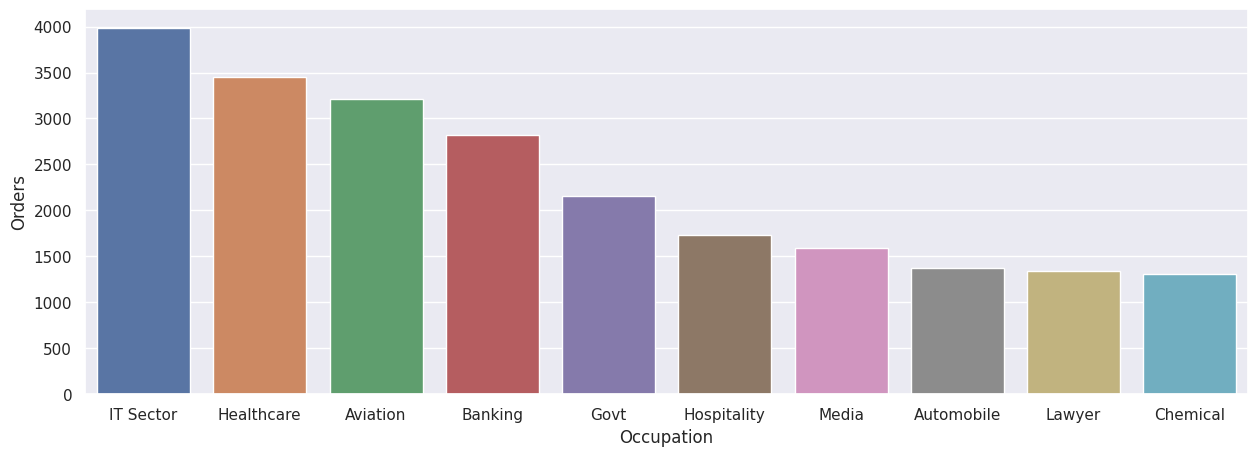

In [40]:
#top 10 occupation with highest orders

orders_occupation=df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation', y='Orders', data=orders_occupation)

<Axes: xlabel='Occupation', ylabel='Amount'>

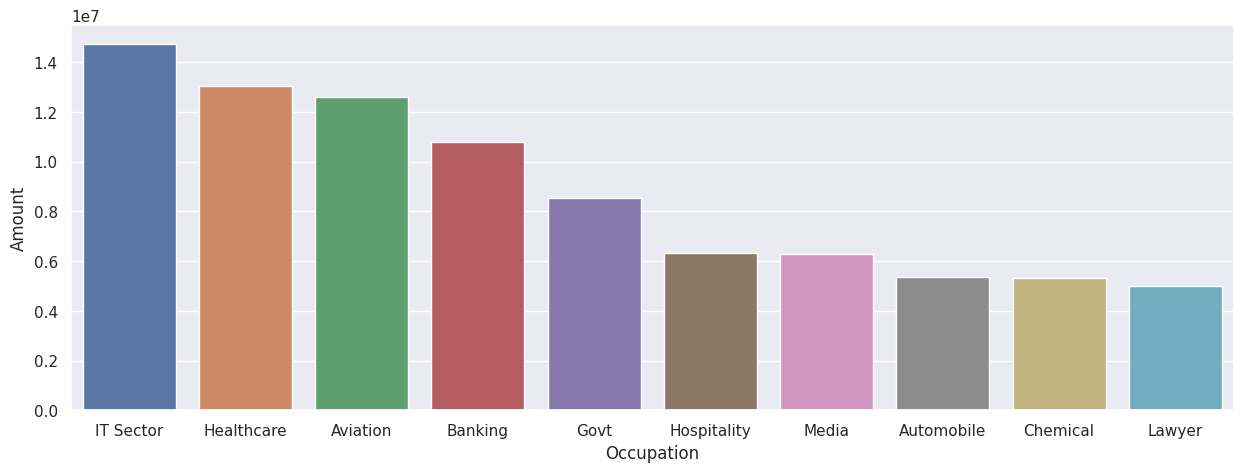

In [41]:
#top 10 occupation with highest sales

sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

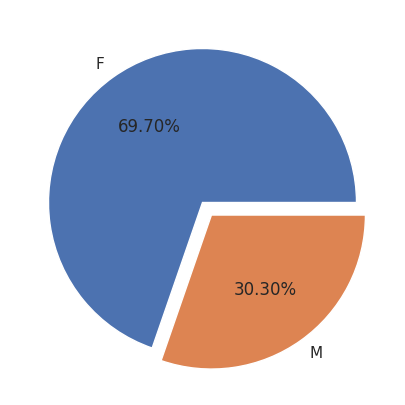

In [42]:
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index,autopct='%2.2f%%', explode=[0,0.1])        
plt.show()

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


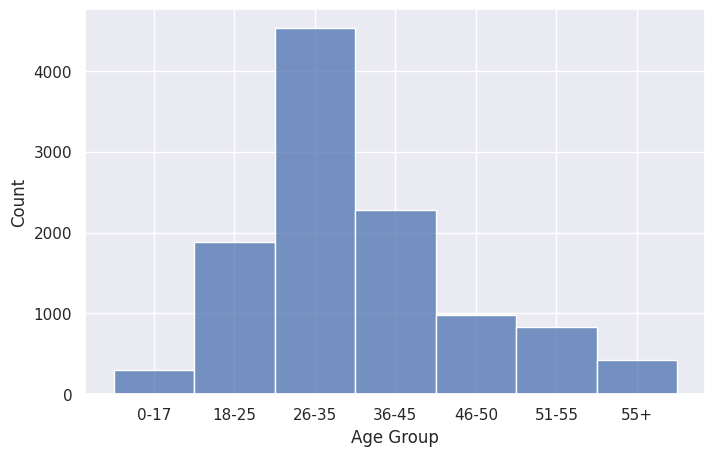

In [44]:
#Histogram for age distribution 
df_sorted= df.sort_values(by='Age Group')
plt.figure(figsize=(8,5))
sns.histplot(x='Age Group',bins=5, data=df_sorted, discrete=True)
plt.show()

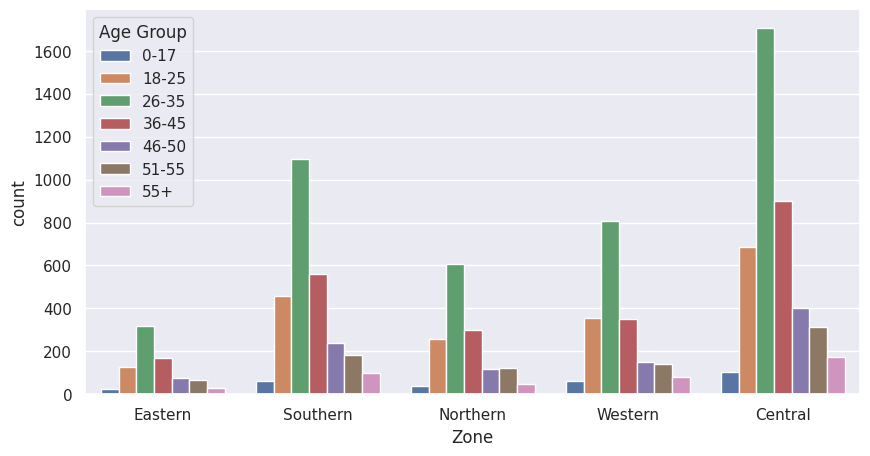

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='Zone', data=df_sorted,hue='Age Group')
plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

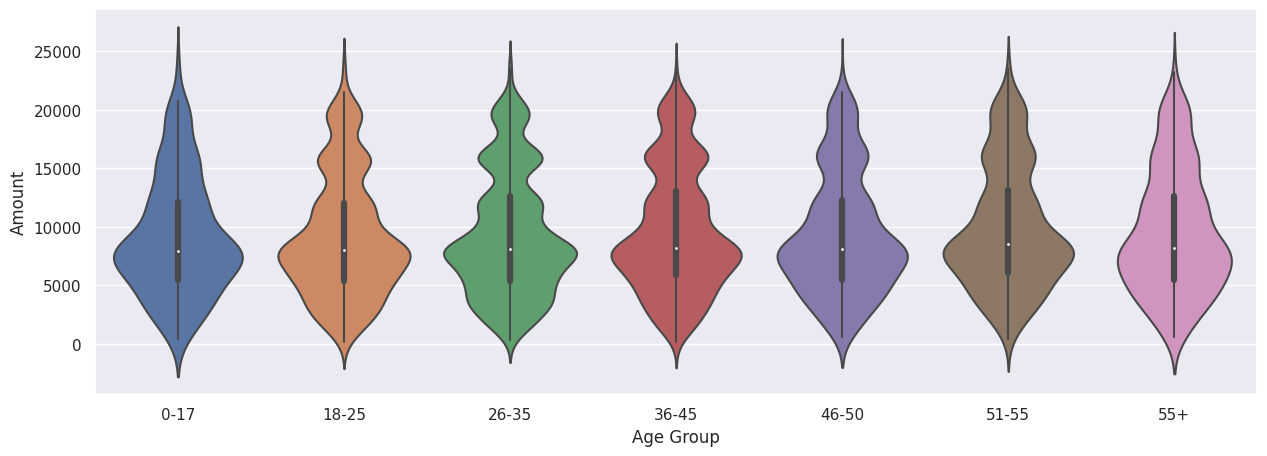

In [46]:
sns.violinplot(x="Age Group", y="Amount", data=df,     order=sorted(df["Age Group"].unique())
)

In [47]:
#Distribution of Amount across different zones and age having tooltip features too
from plotly.express import scatter
scatter(data_frame=df, x='Age', y='Amount', color='Zone', height=1000, hover_name='Cust_name')


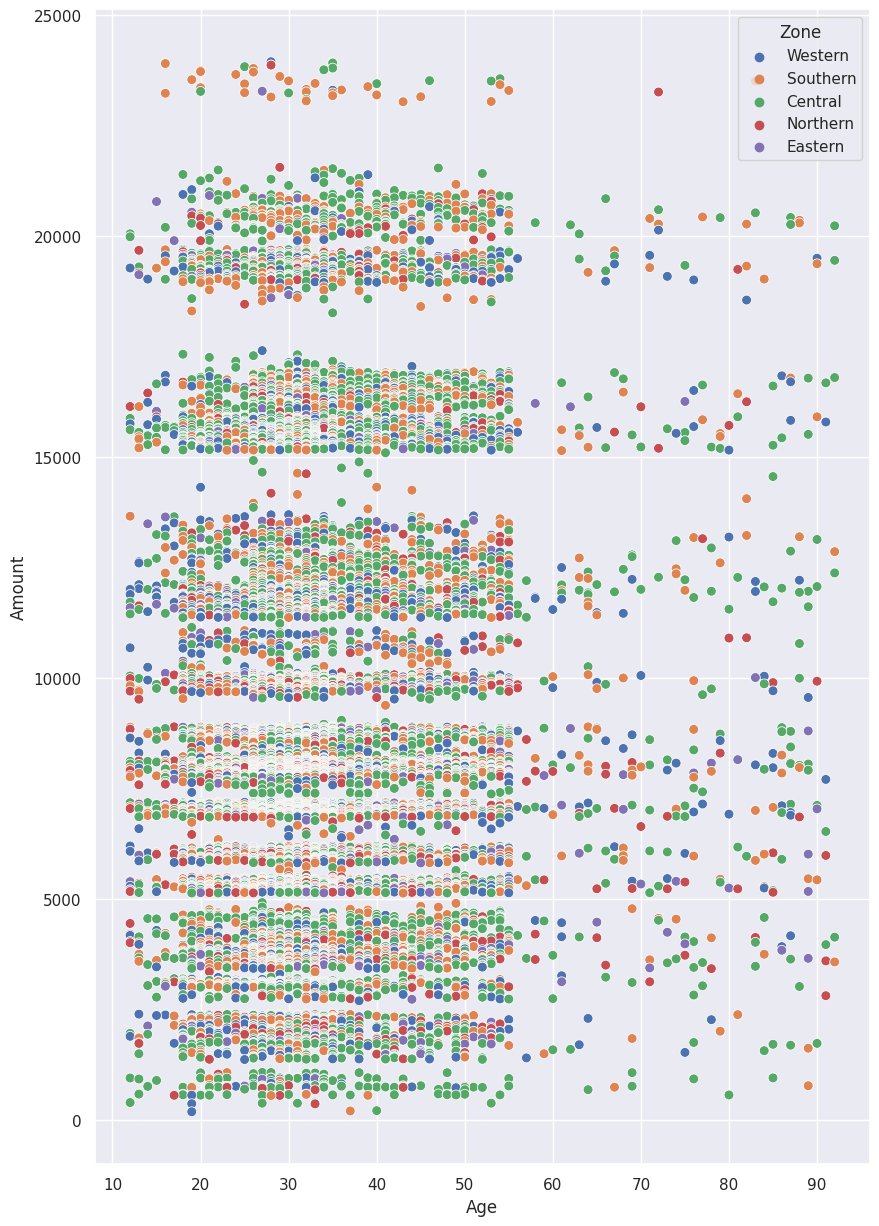

In [48]:
#Amount distribution across different zones and ages
plt.figure(figsize=(10,15))
sns.scatterplot(x='Age', y='Amount', hue='Zone', data=df, s=50, alpha=1)
plt.show()

In [49]:
from plotly.express import scatter
plt.figure(figsize=(7,5))
scatter(data_frame=df, x='Age', y='Orders', color='Zone',  hover_name='Cust_name')

<Figure size 700x500 with 0 Axes>

In [50]:
from plotly.express import bar
for column in ['Gender', 'Age Group', 'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders']:
    bar(data_frame=df[column].value_counts().to_frame().reset_index(), x=column, y='count').show()

In [51]:
#highest spender
max_amount=df['Amount'].max()
max_spender=df[df['Amount']==max_amount]['Cust_name'].iloc[0]
print("Max spender is ", max_spender, "with amount of",max_amount)

Max spender is  Sanskriti with amount of 23952


In [52]:
#lowest spender
min_amount=df['Amount'].min()
min_spender=df[df['Amount']==min_amount]['Cust_name'].iloc[0]
print("Minimum spender is ", min_spender, "with amount of", min_amount)

Minimum spender is  Brumley with amount of 188


In [53]:
#highest spender id
max_amount=df['Amount'].max()
max_spender_id=df[df['Amount']==max_amount]['User_ID'].iloc[0]
print("Max spender id is ", max_spender_id, "with amount of",max_amount)

Max spender id is  1002903 with amount of 23952


In [54]:
#total sales and average of each gender
total_sales = df.groupby("Gender")["Amount"].sum()
print(total_sales)

avg_sales = df.groupby("Gender")["Amount"].mean()
print(avg_sales)

Gender
F    74307679
M    31871146
Name: Amount, dtype: int64
Gender
F    9492.549693
M    9365.602703
Name: Amount, dtype: float64


**Hypothesis Testing : t-test**

In [55]:
#  Split by gender 
male_sales = df[df['Gender'] == 'M']['Amount']
female_sales = df[df['Gender'] == 'F']['Amount']

# Hypothesis:
# H0: Mean spending of males = Mean spending of females
# H1: Mean spending of males ≠ Mean spending of females

t_stat, p_value = stats.ttest_ind(male_sales, female_sales)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant difference in spending between genders.")
else:
    print("Fail to reject H0: No significant difference in spending between genders.")

t-statistic: -1.184031064796961
p-value: 0.23642582867742387
Fail to reject H0: No significant difference in spending between genders.


**Conclusion - unmarried women age group 26 - 35 from Uttar Pradesh, Maharashtra & Karnatake occupation are who belong to IT, Healthcare & Aviation occupation are likely to buy products from Food, Clothing and Electronics category.**